In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("data.csv")

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
# 数据预处理
# 1.名字和票号跟生存没关系,Cabin缺失值太多，inplace设置为true覆盖原表
data.drop(["Cabin","Name","Ticket"], inplace=True, axis=1)


In [11]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [13]:
# 处理缺失值，Age缺失值不是特别多，而且和生存率有关
data["Age"] = data["Age"].fillna(data["Age"].mean())


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [15]:
#embarked只有俩缺失值，直接删掉这俩条数据
data = data.dropna(axis=0)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [20]:
# 查看Embarked有多少类
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
# 将 S，C，Q转换为 0,1,2
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
data["Embarked"].unique()

array([0, 1, 2], dtype=int64)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0


In [26]:
# 把性别改为
data["Sex"] = (data["Sex"] == "male").astype("int")

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [28]:
x = data.iloc[:,data.columns != "Survived"]

In [29]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,0
1,2,1,0,38.000000,1,0,71.2833,1
2,3,3,0,26.000000,0,0,7.9250,0
3,4,1,0,35.000000,1,0,53.1000,0
4,5,3,1,35.000000,0,0,8.0500,0
5,6,3,1,29.699118,0,0,8.4583,2
6,7,1,1,54.000000,0,0,51.8625,0
7,8,3,1,2.000000,3,1,21.0750,0
8,9,3,0,27.000000,0,2,11.1333,0
9,10,2,0,14.000000,1,0,30.0708,1


In [30]:
y = data.iloc[:, data.columns == "Survived"]

In [31]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [34]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y ,test_size=0.3)

In [35]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
190,191,2,0,32.000000,0,0,13.0000,0
97,98,1,1,23.000000,0,1,63.3583,1
378,379,3,1,20.000000,0,0,4.0125,1
43,44,2,0,3.000000,1,2,41.5792,1
799,800,3,0,30.000000,1,1,24.1500,0
74,75,3,1,32.000000,0,0,56.4958,0
404,405,3,0,20.000000,0,0,8.6625,0
274,275,3,0,29.699118,0,0,7.7500,2
137,138,1,1,37.000000,1,0,53.1000,0
271,272,3,1,25.000000,0,0,0.0000,0


In [36]:
# 发现索引乱了，改索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [38]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,191,2,0,32.000000,0,0,13.0000,0
1,98,1,1,23.000000,0,1,63.3583,1
2,379,3,1,20.000000,0,0,4.0125,1
3,44,2,0,3.000000,1,2,41.5792,1
4,800,3,0,30.000000,1,1,24.1500,0
5,75,3,1,32.000000,0,0,56.4958,0
6,405,3,0,20.000000,0,0,8.6625,0
7,275,3,0,29.699118,0,0,7.7500,2
8,138,1,1,37.000000,1,0,53.1000,0
9,272,3,1,25.000000,0,0,0.0000,0


In [39]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

score

0.7415730337078652

In [41]:
# 使用交叉验证试试
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf,x,y,cv=10).mean()

score

0.7469611848825333

0.8143896833503576


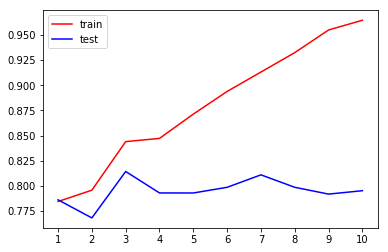

In [42]:
tr = []
te = []

for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,
                                max_depth=i+1
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))

plt.plot(range(1,11), tr, color="red", label="train")
plt.plot(range(1,11), te, color="blue", label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

0.8166624106230849


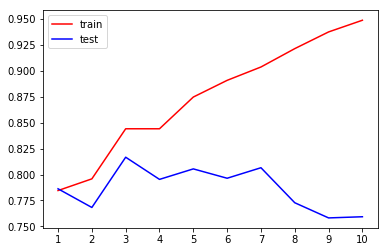

In [43]:
# 由图可知最大深度等于3可以是合适的
# 试试用熵
tr = []
te = []

for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,
                                max_depth=i+1,
                                 criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))

plt.plot(range(1,11), tr, color="red", label="train")
plt.plot(range(1,11), te, color="blue", label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [44]:
# 由图看出，，差不多，但比刚刚好一点点,所以留着
# 网格搜索：帮助我们同事调整多个参数的技术，枚举技术

In [46]:
from sklearn.model_selection import GridSearchCV

import numpy as np
# 在数据范围0-0.5，生成50个排好序的随机数
gini_threholds = np.linspace(0, 0.5, 50)

# 一串参数和这些参数对应的，我们希望网格搜索来搜索的参数的取值范围
parameters ={
    "criterion":("gini","entropy"),
    "splitter":("best","random"),
    "max_depth":[*range(1,10)],
    "min_samples_leaf":[*range(1,50,5)],
    "min_impurity_decrease":[*np.linspace(0, 0.5, 50)]
}



clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS = GS.fit(Xtrain,Ytrain)

In [47]:
GS.best_params_ #从我们输入的参数和参数取值的列表中，返回最佳组合

{'criterion': 'entropy',
 'max_depth': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [49]:
GS.best_score_ #网格搜索后的模型的评判标准

0.8408360128617364